# **Descriptive Statistics**
#### This notebook presents the descriptive statistics of the numerical and categorical variables through the **measures of central tendency** and **measures of spread.**

Statistics is divided into two major areas:

- **Descriptive statistics:** describe and summarize data;
- **Inferential statistics:** methods for using sample data to make general conclusions (inferences) about populations.

This tutorial focuses on descriptive statistics of both numerical and categorical variables and is divided into two parts:

- Measures of central tendency;
- Measures of spread.

In this section, we will be giving short numeric stats summaries concerning the different measures of central tendency and dispersion of the dataset.

let’s work on some practical examples through a descriptive statistics environment in Pandas.

In [76]:
# Importa libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# Load the dataset
df = pd.read_csv("sample.csv", sep=",")

In [78]:
# Print the data
df.head(10)

,Country,Age
0,Finland,71
1,Denmark,30
2,Norway,30
3,Iceland,82
4,Netherlands,29
5,Switzerland,59
6,Sweden,29
7,New Zealand,72
8,Canada,75
9,Austria,37


In [79]:
# Before stats, a quick look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  156 non-null    object
 1   Age      156 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


The dataset consists of 310 observations and 2 columns. One of the attributes is numerical, and the other categorical. Both columns have no missing values.

# 1. Numerical variable

The numerical variable we are going to analyze is `Age`. First step is to visually observe the variable. So let's plot an histogram and a boxplot.

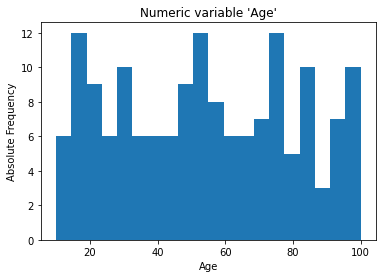

In [80]:
# Histogram
plt.hist(df.Age, bins=20)
plt.xlabel("Age")
plt.ylabel("Absolute Frequency")
plt.title("Numeric variable 'Age'")
plt.show()

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, "Numeric variable 'Age'")]

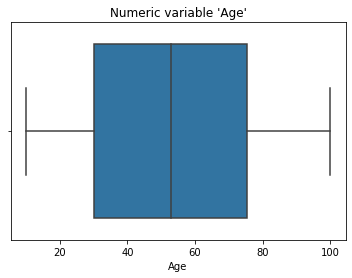

In [126]:
# Boxplot
sns.boxplot(x="Age", data=df, orient="h").set(xlabel="Age", title="Numeric variable 'Age'")

In [129]:
# Create a dataframe and display the 5-n summary stats
box = {"5-n summary": ["Age"],
           "Min": [df.Age.min()],
           "Q1": [df.Age.quantile(.25)],
           "Median": [df.Age.quantile(.5)],
           "Q3": [df.Age.quantile(.75)],
           "Max": [df.Age.max()]
}
plot = pd.DataFrame(box, columns=["5-n summary","Min","Q1","Median","Q3","Max"])
plot.set_index("5-n summary", inplace=True)

boxplot = plot.T
print(boxplot)


5-n summary     Age
Min           10.00
Q1            30.00
Median        53.00
Q3            75.25
Max          100.00


It is also possible to visually observe the variable with both a histogram and a boxplot combined. 

C:\Users\jvish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jvish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


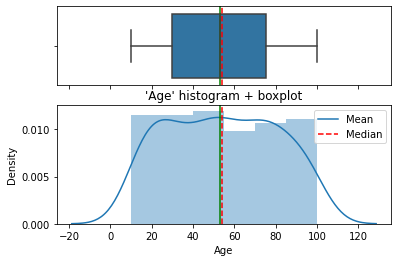

In [83]:
# Histogram + boxplot
Age = df.Age
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.8, 1.2)})

mean=np.array(Age).mean()
median=np.median(Age)

sns.boxplot(Age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(Age, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.title("'Age' histogram + boxplot")

ax_box.set(xlabel='')
plt.show()

## 1.1. Measures of Central Tendency

In [84]:
# Mean
df.Age.mean()

# Round 2 decimals: 
# np.array(Age).mean().round(2)

53.89102564102564

In [85]:
# Median
df.Age.median()

53.0

#### Which metric is more robust to outliers?

The mean is the one to use with symmetrically distributed data, otherwise, use the median. However, an important property of the mean is that it includes every value in your data set as part of the calculation.

## 1.2. Measures of Spread

In [86]:
# Standard deviation
df.Age.std()

# Round 2 decimals:
# np.array(Age).std().round(2)

26.276095776653243

In [87]:
# Variance
df.Age.var()

# Round 2 decimals:
# np.array(Age).var().round(2)

690.4332092638543

In [88]:
# Percentiles 2%%
df.Age.quantile(0.25)

30.0

In [133]:
# Percentile 75%
df.Age.quantile(0.75)

75.25

In [90]:
# In one go
df.Age.quantile(q=[.25, .75])

0.25    30.00
0.75    75.25
Name: Age, dtype: float64

In [138]:
# Minimum and Maximum
df.Age.min(), df.Age.max()


(10, 100)

In [92]:
# Skewness (with scipy)
scipy.stats.skew(df.Age)

0.050165289437098845

In [93]:
# kurtosis (with scipy)
scipy.stats.kurtosis(df.Age)

-1.1996964709952147

## 1.3. Others

In [94]:
# Size (number of rows)
df.Age.count()

156

In [95]:
# Number of uniques (total distinct)
df.Age.nunique()

72

In [96]:
# Uniques (distinct)
df.Age.unique()

array([ 71,  30,  82,  29,  59,  72,  75,  37,  19,  15,  79,  63,  66,
        38,  26,  20,  74,  97,  41,  88,  86,  54,  69,  44,  51,  46,
        35,  25,  53,  58,  52,  23,  68,  57,  78,  95,  27,  76,  42,
        18,  91,  17,  96,  98,  64,  47,  62,  85,  90,  13,  48, 100,
        10,  21,  77,  55,  65,  93,  28,  83,  34,  92,  89,  31,  22,
        61,  45,  39,  80,  14,  43,  16], dtype=int64)

# 2. Categorical Variable
The categorical variable we are going to analyze is `Country`. Let’s plot a bar chart and get a visual observation of the variable.

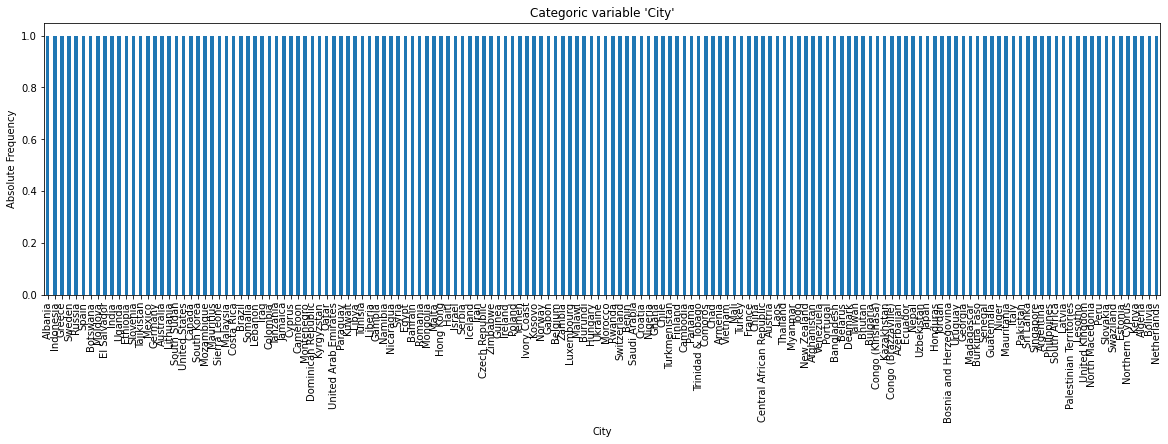

In [109]:
# Bar plot
plt.figure(figsize=(20,5))
df.Country.value_counts().plot.bar()
plt.xlabel("Country")
plt.ylabel("Absolute Frequency")
plt.title("Categoric variable 'Country'")
plt.show()

## 2.1. Measures of Central Tendency

In [98]:
# Mode
df.Country.mode()[0]

'Afghanistan'

## 2.2. Measures of spread

In [111]:
# Number of uniques
df.Country.nunique()

156

In [142]:
# Uniques (distinct)
df.Country.unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [113]:
# Most frequent unique (value count)
df.Country.value_counts().head(1)

Albania    1
Name: Country, dtype: int64

## 2.3. Others

In [114]:
# Size (number of rows)
df.Country.count()

156

In [115]:
# % of the highest unique (fraction of the 
# most common unique in regards to all the others)
p = df.Country.value_counts(normalize=True)[0]
print(f"{p:.1%}")

0.6%


---

The `describe()` method shows the descriptive statistics gathered in one table. By default, stats for numeric data. The result is represented as a pandas dataframe.

In [116]:
# Numeric stats
df.describe()

,Age
count,156.000000
mean,53.891026
std,26.276096
min,10.000000
25%,30.000000
50%,53.000000
75%,75.250000
max,100.000000


In [117]:
# Adding other non-standard values 
# for instance, the 'variance'
describe_var = df.describe()
describe_var.append(pd.Series(df.var(), name='variance'))

,Age
count,156.000000
mean,53.891026
std,26.276096
min,10.000000
25%,30.000000
50%,53.000000
75%,75.250000
max,100.000000
variance,690.433209


In [118]:
# Displaying categorical data
df.describe(include="O")

# The same as:
# df.describe(exclude=['float64','int64'])
# df.describe(include=[np.object])

,Country
count,156
unique,156
top,Albania
freq,1


In [119]:
# By passing the parameter include='all'
# displays both numeric and categoric 
# variables at once
df.describe(include="all")

,Country,Age
count,156,156.000000
unique,156,NaN
top,Albania,NaN
freq,1,NaN
mean,NaN,53.891026
std,NaN,26.276096
min,NaN,10.000000
25%,NaN,30.000000
50%,NaN,53.000000
75%,NaN,75.250000


# Conclusion

These are the basics of descriptive statistics when developing an exploratory data analysis project with the help of Pandas, Numpy, Scipy, Matplolib and/or Seaborn. When well performed, these stats help us to understand and transform the data for further processing.

Remember always be a skeptic. Look at the data with your own eyes (don't fully rely on statistics), and graphically visualize the variables (use and abuse of the visuals).

---

**Author:** Gonçalo Guimarães Gomes. Portuguese. 